I used Google CoLab because I couldn't install the dependencies locally.  The zip file containing the shape file is in ASII/Data/ and TDdict.json/BUdict.json are built by ASII/Scripts/computeTE_northeast.py

In [0]:
!pip install geopandas

In [0]:
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import json
%matplotlib inline


def get_normalized_TE(TE_type):
  with open(TE_type+'dict.json') as jsonfile:
    TEdict = json.load(jsonfile)
  TEmax = max(TEdict.values())
  TEmin = min(TEdict.values())
  for key in TEdict:
    TEdict[key] = (TEdict[key]-TEmin) / (TEmax - TEmin)
    if TEdict[key] < 0.01:
      TEdict[key] += 0.1
  return TEdict


def state_plotter(states, TE_type):
  if TE_type not in ['TD', 'BU']:
    raise ValueError('Must use TD or BU transfer entropy')
  fig, ax = plt.subplots(figsize=(5, 5))
  plt.title(TE_type)
  plt.axis('off')
  TEdict = get_normalized_TE(TE_type)
  for n in states:
    alpha = TEdict[n]
    usa[usa.STUSPS == f'{n}'].plot(ax=ax, alpha=alpha, edgecolor='k', linewidth=2, color='g')

In [0]:
usa = gpd.read_file('cb_2018_us_state_20m.shp')
#usa.head()
states = ['CT', 'DC', 'DE', 'MA', 'MD', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']

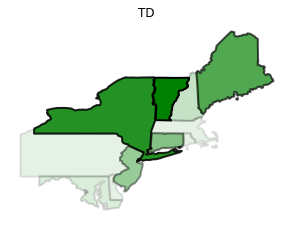

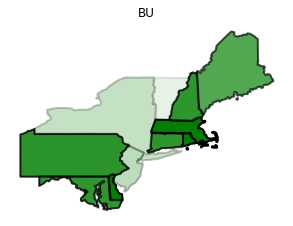

In [67]:
state_plotter(states, 'TD')
state_plotter(states, 'BU')